In [29]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Distribuzione Binomiale (k successi su n tentativi)

La Distribuzione Binomiale è una distribuzione di probabilità discreta utilizzata per calcolare la probabilità di ottenere un determinato numero di successi su una certa quantità di ripetizioni dello stesso esperimento.

Le 4 condizioni fondamentali per applicare questo tipo di distribuzione sono le seguenti:

I risultati possibili sono di successo o fallimento

I risultati delle prove precedenti non influenzano il risultato di un'altra prova

Il numero di prove è predeterminato

La probabilità di successo di ogni prova deve sempre essere p

I parametri utilizzati sono:

n= il numero di prove

p= probabilità di successo di ogni prova

(n su p) p^k (1-p)^n-k

# Esempio 1

Un nuovo Ristorante in città ha una probabilità di sopravvivere del 20% dopo il primo anno.
Se quest'anno hanno aperto 14 ristoranti, qual'è la probabilità che esattamente 4 ristoranti sopravvivano dopo il primo anno?
n= 14 p= 0.2

In [4]:
sp.stats.binom.pmf(k=4,n=14,p=0.2)

0.1719704905318402

# Esempio 2

Una coppia ha un 25% di probabilità di avere un figlio con gruppo sanguigno 0.
Qual'è la probabilità che 3 dei loro 5 figli abbiano il gruppo 0?
n=5
p=0.25

In [6]:
X_rv= sp.stats.binom(n=5,p=0.25)
proba_3= X_rv.pmf(3)
proba_3

0.08789062499999999

Qual è la probabilità che ALMENO 3 dei loro  5 figli abbiano il gruppo 0? P(X >= 3)

In [9]:
#Usando Pmf() #Probability Mass Function

at_least_3= X_rv.pmf(3) + X_rv.pmf(4) + X_rv.pmf(5)
at_least_3

0.10351562499999999

In [10]:
at_least_3_cdf= 1 - X_rv.cdf(2) #praticamente 100% (1) - probabilità accumulata (CDF) da 2 incluso a 0.
at_least_3_cdf

0.103515625

# Distribuzione Poisson

La Distribuzione di Poisson è una distribuzione di probabilità discreta che viene utilizzata quando si vuole conoscere la probabilità che un certo numero di successi/eventi si verifichino in un determinato intervallo temporale.

Esempi:
Calcolare la probabilità di avere un determinato numero di visitatori sul proprio sito entro un'ora, conoscendo la media dei visitatori passati per ora.

Stimare il numero di incidenti d'auto a un incrocio sulla base dello storico passato.
I parametri per utilizzare la formula di Poisson sono i seguenti:

x = numero di eventi in un determinato intervallo

λ = il numero medio di eventi per intervallo (media)

e = numero di Eulero (costante uguale a 2,71828...)


λ^x * e^-λ/x!, dove λ numero medio di successi su un intervallo Var(X)=λ 

# Esempio 1

Il numero di chiamate in arrivo ad un call center segue una distribuzione di Poisson a un tasso di 5 chiamate/ora.
Qual'è la probabilità che arrivino esattamente 6 chiamate tra le 22 e le 23? (praticamente la probabilità di avere 6 chiamate in un ora piuttosto che 5)

In [11]:
proba_6= sp.stats.poisson.pmf(
         k=6,  #x -> 6 chiamate/ora
         mu=5) #mean(λ) 5 chiamate/ora

proba_6 #Abbiamo il 14.6% di probabilità di avere esattamente 6 chiamate/ora.

0.1462228081398754

# Esempio 2

Un Ristorante riceve in media 100 clienti al giorno.
Determina le seguenti probabilità:
P(X > 110 clienti in un determinato giorno)?

In [14]:
proba_g_110= 1 - sp.stats.poisson.cdf(k=110, mu=100) 

proba_g_110 

0.14713734844226967

# Distribuzione Normale 

La Distribuzione Normale o Gaussiana è la distribuzione di probabilità continua più importante ed utilizzata in statistica.

Caratteristiche:

La curva delle frequenze della distribuzione Normale ha una forma caratteristica, simile ad una campana
Il valore medio si trova esattamente al centro della distribuzione, e la curva è simmetrica rispetto ad esso: quindi valor medio, mediana e moda coincidono

La maggior parte delle osservazioni si concentrano intorno al valore medio

Allontanandosi dal valore medio, la curva si avvicina sempre più all’asse delle ascisse ma non giunge mai a toccarlo: quindi si possono avere anche (pochissime) osservazioni che risultano molto distanti dalla media

Regola empirica della Distribuzione Normale:

Il 68,26% dei valori è compreso fra -1 e +1 deviazioni standard.

Il 95,44% dei valori è compreso fra -2 e +2 deviazioni standard.

Il 99,73% dei valori è compreso fra -3 e +3 deviazioni standard.

Un'area di probabilità del 95% è compresa fra -1.96 e +1.96 deviazioni standard.

Un'area di probabilità del 99% è compresa fra -2.576 e + 2.576 deviazioni standard.

La Distribuzione Normale risulta la più importante perchè la maggior parte della variabili nel mondo reale segue esattamente una distribuzione di tipo normale come ad esempio: Altezza popolazione, peso, misurazioni mediche, voti scolastici, variabili di tipo finanziario etc.

pdf= (1/σ√2π)* e^(-(x-μ)^2)/(2σ^2), dove μ=media, σ=std

# Esempio 1

In India in una scuola superiore i voti del test di matematica seguono una Distribuzione Normale con media=100 e deviazione standard= 15

In [15]:
mean=100
sd=15

#instanciate normal distributed random variable with mean=100 and sd=15

X_rv= sp.stats.norm(loc=mean, scale=sd)

Il Ministro dell'Educazione indiano decide che il punteggio minimo che gli studenti devono raggiungere per essere considerati competenti in matematica è di 80 punti.
Qual'è quindi la % di studenti che riuscirà a raggiungere un punteggio >=80 ?

In [16]:
#Let's use the Cdf

p_g_80= 1 - X_rv.cdf(80) 
p_g_80 #circa il 91% verrà considerato competente in matematica

0.9087887802741321

Un'università indiana molto selettiva vuole fissare uno standard molto elevato agli studenti della scuola superiore per poter accedere ai loro corsi.
L'università ammetterà soltanto gli studenti con un punteggio nel test di matematica facente parte del 2% dei migliori punteggi della popolazione.
Quale punteggio minimo quindi dovranno ottenere gli studenti per poter entrare all'università?

In [17]:
#Dobbiamo usare in questo caso l'inversa della Cdf > Ppf (Percent point function (inverse of cdf)
#per ottenere il punteggio relativo al 2% (punteggi/valori dal 98% al 100% della nostra Distribuzione)

proportion_of_admitted= 0.02 #2%

#Let's use the inverse of Cdf -> Ppf (Percent point function (inverse of cdf)

score= X_rv.ppf(1 - proportion_of_admitted) #100% - cdf fino al 98%

print('Il punteggio minimo è pari a:', score)

Il punteggio minimo è pari a: 130.80623365947733


# Esempio 2

The heights of the 430 National Basketball Association players were listed on team rosters at the start of the 2005–2006 season.

The heights of basketball players have an approximate normal distribution with mean, µ = 79 inches and a standard deviation, σ = 3.89 inches.

For each of the following heights, calculate the z-score and interpret it using complete sentences.

77 inches

85 inches

If an NBA player reported his height had a z-score of 3.5, would you believe him? Explain your answer.

Z=x-μ/σ

In [21]:
mean= 79
sd=3.89

In [22]:
z_score_77= (77-79) / 3.89 # "quante deviazioni standard è distante dalla media"
z_score_77 

-0.5141388174807198

The height of 77 inches is 0.5141 standard deviations below the mean. An NBA player whose height is 77 inches is shorter than average.

In [23]:
z_score_85= (85-79) / 3.89
z_score_85

1.5424164524421593

The height 85 inches is 1.5424 standard deviations above the mean. An NBA player whose height is 85 inches is taller than average.

"If an NBA player reported his height had a z-score of 3.5, would you believe him? Explain your answer." 👇
Z-score= 3.5 --> 0.0233%

Riconverto Z score --> X=μ+Zσ

In [24]:
height= mean + 3.5*sd #convert from z_score to real value
height

92.615

In [26]:
X_rv= sp.stats.norm(loc=mean, scale= sd)

proba_g_92= 1 - X_rv.cdf(92.615)

print(f'Probability of height equal to 92.615 -> 3.5 zscore is : {proba_g_92*100}%') #quasi nulla, MOLTO IMPROBABILE

Probability of height equal to 92.615 -> 3.5 zscore is : 0.02326290790355401%


# Teorema Limite Centrale

Il teorema del limite centrale insieme alla legge dei grandi numeri è uno dei teoremi fondamentali in statistica e probabilità.

Esso afferma infatti che la distribuzione della media campionaria è normale a condizione che l'ampiezza del campione sia sufficientemente grande, solitamente >=30.

Questo vuol dire che se estraiamo in maniera casuale una serie di n.campioni di grandezza >=30 dalla popolazione di partenza e calcoliamo la media dei valori per ciascun campione, le medie che otterremo si distribuiranno seguendo la forma della Distribuzione Normale.Questo avviene indipendentemente dalla distribuzione della popolazione di partenza.

Sapendo infatti che la distribuzione della media campionaria è normale possiamo mettere in pratica la regola empirica della distribuzione normale:

Il 68,26% dei valori è compreso fra -1 e +1 deviazioni standard.

Il 95,44% dei valori è compreso fra -2 e +2 deviazioni standard.

Il 99,73% dei valori è compreso fra -3 e +3 deviazioni standard.

Un'area di probabilità del 95% è compresa fra -1.96 e +1.96 deviazioni standard.

Un'area di probabilità del 99% è compresa fra -2.576 e + 2.576 deviazioni standard.

Data una popolazione, consideriamo una feature (esempio: altezza, peso, stipendio, etc...) per ogni individuo.
Qualsiasi sia la forma della distribuzione di partenza (popolazione) la distribuzione delle medie dei campioni presi dalla popolazione tenderà ad una distribuzione normale.

Qualsiasi sia la forma della distribuzione di partenza (popolazione) la distribuzione delle medie dei campioni presi dalla popolazione tenderà ad una distribuzione normale.

the mean of the means =  μ (Law of Large Numbers)

the standard deviation of the means =  𝜎/√𝑛 (Central Limit Theorem)

In [31]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: ylabel='Count'>

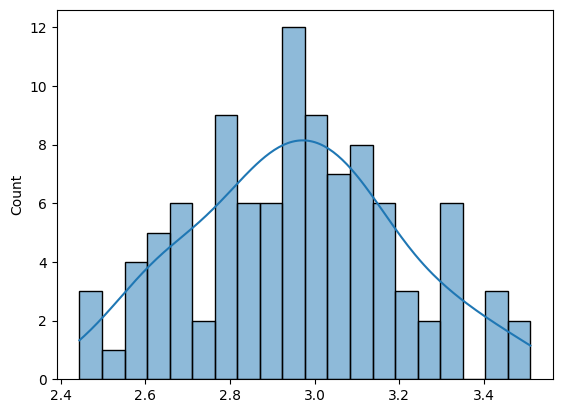

In [32]:
n = 30 # CLT applies mostly with n>=30
N = 100

means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20, kde=True)

In [34]:
mu = tips_df['tip'].mean() #media delle tips

print('Mean:', mu)

sd = tips_df['tip'].std() #deviazione standard delle tips

print('Standard Deviation:', sd)

skewness = 'right'  #asimmetria a destra in questo caso

print('Skewness:', skewness) #asimmetria a destra in questo caso

Mean: 2.99827868852459
Standard Deviation: 1.3836381890011822
Skewness: right


In [35]:
index_df = ['mean', 'stdev','skewness']

theory = [mu, sd/np.sqrt(n), 0]

real_life = [np.mean(means), np.std(means), sp.stats.skew(means)] 

comparison_df = pd.DataFrame(list(zip(theory,real_life)), 
                             columns = ["CLT Theory","Real Tips"],
                             index = index_df)
round(comparison_df,2)

#oppure usa describe() sul dataframe

,CLT Theory,Real Tips
mean,3.00,2.96
stdev,0.25,0.24
skewness,0.00,0.09


# Intervallo di confidenza

Dopo aver visto il Teorema del Limite Centrale e la sua importanza, in quanto ci dice che la distribuzione della media campionaria è normale a patto che l'ampiezza del campione sia sufficientemente grande (>= 30) e questo avviene indipendentemente dalla distribuzione della popolazione.

Quello che vogliamo fare adesso è costruire degli intervalli di confidenza che ci consentano di stabilire con quanta sicurezza possiamo affermare che il parametro della popolazione che vogliamo valutare (per esempio la media della popolazione) ricada proprio all'interno di questi intervalli.

Questi intervalli di confidenza verranno costruiti sulla base di campioni estratti dalla popolazione iniziale in modo da capire con quanta sicurezza il reale parametro della popolazione (es:media) sia contenuto all'interno dei limiti dell'intervallo di confidenza del campione.

Solitamente l'intervallo di confidenza più utilizzato è quello del 95%.

Per calcolare i limiti dell'intervallo servono 4 valori:

La media del campione

L'ampiezza del campione (grandezza)

La deviazione standard della popolazione (o del campione in caso non fosse disponibile)

Il coefficiente di confidenza

Praticamente i limiti (i valori) dell'intervallo di confidenza vengono calcolati facendo la media del campione X più o meno il coefficiente di confidenza Z che moltiplica l'errore standard del campione.

# Esempio 1

You want to rent an unfurnished one-bedroom apartment in Boston next year.

The mean monthly rent for a random sample of 60 apartments advertised on Airbnb is $1000.

Assume a population standard deviation of $200. Construct a 95% confidence interval.

In [37]:
sample_mean= 1000 #media del campione
sample_size=60 #grandezza del campione (>=30)
sd=200 #deviazione standard della popolazione
confidence_value= 0.95 #95%

#Let's calculate the confidence interval:

confidence_interval= sp.stats.norm.interval(alpha=0.95, loc=sample_mean, scale=(sd/np.sqrt(sample_size)))
confidence_interval

/var/folders/fq/5pj89kx1705c62qq2l7hgw440000gn/T/ipykernel_1008/684044097.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  confidence_interval= sp.stats.norm.interval(alpha=0.95, loc=sample_mean, scale=(sd/np.sqrt(sample_size)))


(949.3939475247336, 1050.6060524752663)

In [38]:
#Manually:

confidence_interval= ( (1000 - 1.96*(200/np.sqrt(60))), (1000 + 1.96*(200/np.sqrt(60))) ) 
confidence_interval

(949.3930176095564, 1050.6069823904436)